## Motor de predicción de bajas
El objetivo es entrenar un modelo que prediga las bajas de clientes.

### Importación de librerías:

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta


import sklearn

### Carga de datos

In [4]:
datos_2018 = pd.read_csv("data/DM_CARTERA_YTD_2018.csv", sep=";", encoding="ISO-8859-1")
datos_2019 = pd.read_csv("data/DM_CARTERA_YTD_2019.csv", sep=";", encoding="ISO-8859-1")
datos_2020 = pd.read_csv("data/DM_CARTERA_YTD_2020.csv", sep=";", encoding="ISO-8859-1")

C:\Users\daniel.pascual\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (87,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\daniel.pascual\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (87,92,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Antes de juntar los tres años en un solo dataframe, vamos a asegurarnos de que las columnas son las mismas.

In [5]:
print("Número de columnas en los datos de 2018:", datos_2018.shape[1])
print("Número de columnas en los datos de 2019:", datos_2019.shape[1])
print("Número de columnas en los datos de 2020:", datos_2020.shape[1])

columnas_totales = datos_2018.columns + datos_2019.columns + datos_2020.columns
columnas_distintas = set(columnas_totales)
print("Número de columnas distintas:", len(columnas_distintas))

Número de columnas en los datos de 2018: 130
Número de columnas en los datos de 2019: 130
Número de columnas en los datos de 2020: 130
Número de columnas distintas: 130


Los tres conjuntos de datos tienen idénticas columnas, así que podemos juntarlos y trabajar con uno solo

In [6]:
df = pd.concat([datos_2018,datos_2019,datos_2020])
df.head()

,ID_CIERRE,ANIO_CARTERA,MES_CARTERA,NUM_LOTE_CARTERA,TIPO_OPERACION,IND_CARTERA,FLG_RENUEVA,COD_POLIZA,FLG_POLIZA_COLECTIVA,COD_TIPO_POLIZA,...,FLG_CAMP_EMPL_COLABORADOR,IMP_CAMP_EMPL_COLABORADOR,FLG_CAMPANA_PROV,IMP_CAMPANA_PROV,FLG_CAMP_MOTOS50,IMP_CAMP_MOTOS50,FLG_CAMP_MUTUALISTA_PROPIETARIO,IMP_CAMP_MUTUALISTA_PROPIETARIO,FLG_CAMP_DESC_ESPECIAL,IMP_CAMP_DESC_ESPECIAL
0,201901,2018,201810,5976,RENOR,1,1,300002300,0,A,...,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
1,201804,2018,201801,5592,RENOR,1,1,300011140,0,A,...,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
2,201806,2018,201803,5661,RENOR,1,1,300020775,0,A,...,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
3,201804,2018,201801,5594,RENOR,1,1,300027508,0,A,...,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
4,201806,2018,201803,5661,RENOR,1,1,300028814,0,A,...,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"


## Preprocesado de datos

### Análisis inicial de los datos

In [7]:
print("Tamaño del dataset:", df.shape)
print("Número de columnas:", df.shape[1])
print("Número de registros:", df.shape[0])

Tamaño del dataset: (849206, 130)
Número de columnas: 130
Número de registros: 849206


In [8]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)
df.dtypes

ID_CIERRE                            int64
ANIO_CARTERA                         int64
MES_CARTERA                          int64
NUM_LOTE_CARTERA                     int64
TIPO_OPERACION                      object
IND_CARTERA                          int64
FLG_RENUEVA                          int64
COD_POLIZA                           int64
FLG_POLIZA_COLECTIVA                 int64
COD_TIPO_POLIZA                     object
DES_FORMA_CONTRATA                  object
COD_FORMA_PAGO                      object
DES_FORMA_PAGO                      object
COD_MODO_PAGO                       object
DES_MODO_PAGO                       object
COD_BANCO                            int64
DES_BANCO                           object
NUM_SUPLEMENTO_REGULADOR             int64
NUM_SUPLEMENTO                       int64
FEC_ALTA_POLIZA                      int64
FEC_EFECTO_POLIZA                    int64
FEC_VCTO_POLIZA                      int64
FEC_BAJA_POLIZA                      int64
FEC_GRABACI

### Análisis de estadísticos

#### Valores numéricos

In [9]:
df.describe()

,ID_CIERRE,ANIO_CARTERA,MES_CARTERA,NUM_LOTE_CARTERA,IND_CARTERA,FLG_RENUEVA,COD_POLIZA,FLG_POLIZA_COLECTIVA,COD_BANCO,NUM_SUPLEMENTO_REGULADOR,NUM_SUPLEMENTO,FEC_ALTA_POLIZA,FEC_EFECTO_POLIZA,FEC_VCTO_POLIZA,FEC_BAJA_POLIZA,COD_CAUSA_ANULACION,NUM_POLIZAS,NUM_CONDUCTORES,COD_PROVINCIA,ID_TRAMO_BONUS,COD_OFICINA_GESTORA,COD_OFICINA_ABRIDORA,COD_AGENTE,COD_PROFESION,TOT_SINIESTROS,SINISESTROS_ACTUAL,COD_TIPO_SINIESTRO,NUM_SINIESTRO,NUM_SINIESTRO_DESF,NUM_SINIESTRO_FAV,FEC_NAC_COND_PRINCIPAL,FEC_CARNET_COND_PRINCIPAL,COD_POSTAL_COND_PRINCIPAL,FEC_NAC_COND_HABITUAL,FEC_CARNET_COND_HABITUAL,COD_POSTAL_COND_HABITUAL,COD_VEHICULO,COD_GRUPO_TARIFA,NUM_POTENCIA_VEHICULO,FLG_RECARGO_CONDUCTOR_RCO
count,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,8.492060e+05,8.492060e+05,8.492060e+05,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,8.492060e+05,849206.000000,8.492060e+05,8.492060e+05,849206.000000,8.492060e+05,849206.000000,849206.000000,849206.000000
mean,201931.523448,2019.004170,201906.927609,6326.794144,0.988187,0.882513,3.012143e+08,0.001815,1163.150985,5.737173,6.098165,2.011056e+07,2.019015e+07,2.020012e+07,2.372162e+06,4.443550,2.355447,1.368179,26.263724,-0.021673,262.914265,262.825798,15852.746741,57.106636,2.016686,0.202762,0.326527,0.279251,0.148701,0.130550,1.931089e+07,1.954007e+07,26484.322531,2.275405e+06,2.299242e+06,2911.937997,1.068560e+08,18.543529,107.955065,0.044775
std,91.037634,0.815922,81.655814,422.718317,0.108046,0.322000,2.840629e+05,0.042560,1110.694964,2.793477,2.862306,7.623082e+04,8.518552e+03,8.529870e+03,6.501439e+06,16.460065,1.700965,0.629177,13.671757,0.542953,136.715494,136.732668,25002.175745,157.172741,3.175869,0.546266,0.715293,0.672598,0.523038,0.383307,2.557007e+06,2.627046e+06,13683.789931,6.292423e+06,6.362495e+06,9438.336178,7.922217e+07,5.725009,52.031764,0.206809
min,201804.000000,2018.000000,201801.000000,5592.000000,0.000000,0.000000,3.000023e+08,0.000000,-1.000000,1.000000,1.000000,1.965010e+07,2.016063e+07,2.017063e+07,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,-5.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.001100e+06,11.000000,-40.000000,0.000000
25%,201901.000000,2018.000000,201810.000000,5970.000000,1.000000,1.000000,3.010429e+08,0.000000,81.000000,4.000000,4.000000,2.006120e+07,2.018091e+07,2.019090e+07,0.000000e+00,-1.000000,1.000000,1.000000,15.000000,0.000000,150.000000,150.000000,250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.954091e+07,1.977091e+07,15008.000000,0.000000e+00,0.000000e+00,0.000000,4.506905e+07,16.000000,80.000000,0.000000
50%,201910.000000,2019.000000,201907.000000,6398.000000,1.000000,1.000000,3.012977e+08,0.000000,1465.000000,5.000000,6.000000,2.014100e+07,2.019062e+07,2.020062e+07,0.000000e+00,-1.000000,2.000000,1.000000,28.000000,0.000000,281.000000,280.000000,450.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.963122e+07,1.988072e+07,28035.000000,0.000000e+00,0.000000e+00,0.000000,1.050544e+08,17.000000,105.000000,0.000000
75%,202007.000000,2020.000000,202004.000000,6730.000000,1.000000,1.000000,3.014392e+08,0.000000,2100.000000,7.000000,8.000000,2.017043e+07,2.020032e+07,2.021032e+07,0.000000e+00,-1.000000,3.000000,2.000000,36.000000,0.000000,361.000000,361.000000,28034.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.976101e+07,1.999101e+07,36900.000000,0.000000e+00,0.000000e+00,0.000000,1.440166e+08,17.000000,136.000000,0.000000
max,202102.000000,2020.000000,202012.000000,7172.000000,1.000000,1.000000,3.093482e+08,1.000000,9998.000000,35.000000,35.000000

* El campo ANIO_CARTERA parece contener simplemente el año. No nos aporta demasiado tal como está, así que podremos quitarlo.
* El campo MES_CARTERA viene en formato 'añomes', podemos extraer el mes por si la época del año influye en la renovación o no.
* El campo FLG_RENUEVA es el target, no se lo podemos dar al modelo, pero lo conservamos de momento ya que lo utilizaremos para entrenar
* El campo COD_POLIZA parece un identificador de la póliza, no aporta a este tipo de estudio.

Veamos si hay columnas con un solo valor, que no aportan nada y deberemos eliminar

In [10]:
todas_utiles = True
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print("La columna ", col, " solo tiene un valor, se podré eliminar")
        todas_utiles = False
if todas_utiles:
    print("Todas las columnas tienen dos o más valores distintos")

Todas las columnas tienen dos o más valores distintos


No se da el caso.

#### Valores categóricos

In [11]:
df.describe(include='object')

,TIPO_OPERACION,COD_TIPO_POLIZA,DES_FORMA_CONTRATA,COD_FORMA_PAGO,DES_FORMA_PAGO,COD_MODO_PAGO,DES_MODO_PAGO,DES_BANCO,FEC_GRABACION_BAJA,DES_CAUSA_ANULACION,COD_MODALIDAD_ANT,COD_MODALIDAD_REG,COD_MODALIDAD_ACT,VAL_MUT_G,VAL_MUT_5,VAL_MUT_1,NUM_ANTIGUEDAD_POLIZA,NUM_ANTI_MUTUALISTA,EDAD,NUM_ANTI_CARNET,FLG_CONDUCTOR_HAB,COD_ZONA_TARIFA,NOTABUREAU,NOTAGLOBAL,NOTA_FACTOR_EXPERIAN,FACTOR_EXPERIAN,IMP_ANUALIDAD_ANTERIOR,IMP_PRIMA_TARIFICADOR_RENOVACION,COD_REGULADOR,PORC_REGULADOR,IMP_DIFERENCIA,IMP_PRIMA_RENOV_FINAL,NUM_BONUS_ANTERIOR,NUM_BONUS_ACTUAL,DES_TRAMO_BONUS,DESC_OFICINA_GESTORA,DESC_OFICINA_ABRIDORA,COD_TIPO_CLIENTE,DES_TIPO_CLIENTE,ID_REL_PROFESION,DESC_TITULACION,DESC_PROFESION,GASTO_TOTAL,GASTO_TOTAL_ACTUAL,DES_TIPO_SINIESTRO,COD_TIPO_VEHICULO,DESC_TIPO_VEHICULO,NUM_ANTI_MATRICULA,DESC_GRUPO_TARIFICACION,COD_REMOLQUE,DESC_MARCA,DESC_MODELO_VERSION,COD_COMBUSTIBLE,NUM_PUERTAS,IMP_VALOR_VEHICULO,FLG_BUEN_MUTUALISTA,FLG_VEHICULO_NUEVO,FLG_RECARGO_CONDUCTOR_DANOS,IMPORTE_TOTAL_DESCUENTO,IMP_DESC_EMPLEADOS_TOTAL,IMP_DESC_COMERCIAL_TOTAL,FLG_DESC_PRECAMPANA,IMP_DESC_PRECAMPANA,FLG_DESC_CAMPANA,IMP_DESC_CAMPANA,FLG_DESC_ESPECIAL,IMP_DESC_ESPECIAL,COD_TIPO_BOLSA_DESCUENTO,FLG_DESC_BOLSA_RETENCION,IMP_DESC_BOLSA_RETENCION,FLG_DESC_REGULADOR,IMP_DESC_REGULADOR,FLG_PRECAM_BUEN_MUTUALISTA,IMP_PRECAM_BUEN_MUTUALISTA,FLG_PRECAM_NUEVO_VEHICULO,IMP_PRECAM_NUEVO_VEHICULO,FLG_PRECAM_MULTIPACK,IMP_PRECAM_MULTIPACK,FLG_CAMPANA_EMPLEADOS,IMP_DESC_EMPLEADOS,FLG_CAMP_EMPL_COLABORADOR,IMP_CAMP_EMPL_COLABORADOR,FLG_CAMPANA_PROV,IMP_CAMPANA_PROV,FLG_CAMP_MOTOS50,IMP_CAMP_MOTOS50,FLG_CAMP_MUTUALISTA_PROPIETARIO,IMP_CAMP_MUTUALISTA_PROPIETARIO,FLG_CAMP_DESC_ESPECIAL,IMP_CAMP_DESC_ESPECIAL
count,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,637230,849206,824803,824803,849206,849206,849206,849206,849205,849206,847820,847820,847820,849206,849206,849206,849204,849206,849206,849206,849206,849206,849206,849206,849206,849201,849206,849206,849206,849206,849206,849206,849206,849203,849202,849206,849206,849206,849206,849206,825335,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206
unique,12,3,3,7,7,3,3,155,967,31,61,59,58,13,14,14,1135,4631,8155,7125,2,3,7,11,20,10,102872,104993,6,11983,31859,101956,16,15,8,70,78,11,12,2,8,272,201964,68023,4,45,44,5472,27,5,306,43088,7,14,24400,4,3,2,80215,6345,80088,2,7411,2,14434,2,2493,4,2,18413,2,344308,2,1093,2,317,2,24,2,2896,2,4326,2,3014,2,108,2,208,2,952
top,RENOR,A,Anual renovable,A,Anual,B,Por Banco,CAIXABANK S.A.,4000-01-01,No Aplica,MI,MI,MI,AB,A9,A9,"0001,00","0001,00","0000,00","0000,00",S,B,Z,E,EZ,"00,000","000000000,00","000000155,44",BA,"000000000,00","0000000000,00","0000000155,44","-0050,00","-0050,00",0 - Sin cambio en el nivel de bonus,180 - OF. GRANADA,180 - OF. GRANADA,1,1 - Licenciado Sanitario,1 - Sanitaria,9 - OTRAS PROFESIONES,1 - MÉDICO,"000000000000000,00","000000000000000,00",0 - Sin Siniestros,BER,BER - BERLINA,"0002,00",17 - Automóviles de 119 a 215 CV,-1,VOLKSWAGEN,"Hasta 750 PMA. Y Hasta 8,5 MTS.",D,5,"000008000,00",0,0,"0,","0000000000,00","000000000,000",0,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","1,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
freq,771806,849163,849163,586575,586575,822868,822868,113127,749435,749435,234428,233892,177148,280208,312930,254821,139042,25364,14339,16801,751493,434694,816696,236971,236971,240992,1319,1117,561937,43529,7338,800,748103,743451,694285,53116,51599,323748,323748,483635,383058,224276,367868,721471,678581,408047,408047,12991,294012,652336,79550,2518,467780,477564,18942,444989,824626,822256,39568,79804

In [12]:
todas_utiles = True
for var in df.describe(include='object'):
    categorias = df[var].unique()
    num_categorias = len(categorias)
    print('Categorías de', var, ':',categorias)
    print('Categorías distintas:',num_categorias)
    if (num_categorias == 1):
        todas_utiles = False
        print("La categoría de ", var, "solo tiene un valor distinto y deberá ser eliminada")
if todas_utiles:
    print("Todas las columnas tienen dos o más valores distintos")

Categorías de TIPO_OPERACION : ['RENOR' 'REH_CART' 'RENONR' 'SUPLR' 'BAJA' 'SUPLCA' 'SUPLRNP' 'EMIS'
 'SUPL' 'REHAB' 'RENOR     ' 'SUSP']
Categorías distintas: 12
Categorías de COD_TIPO_POLIZA : ['A' 'R' '-1']
Categorías distintas: 3
Categorías de DES_FORMA_CONTRATA : ['Anual renovable' 'Temporal de ajuste Remolques' 'No Informado']
Categorías distintas: 3
Categorías de COD_FORMA_PAGO : ['A' 'S' 'T' 'U' 'E' 'R' '-1']
Categorías distintas: 7
Categorías de DES_FORMA_PAGO : ['Anual' 'Semestral' 'Trimestral' 'Unica' 'Semestral sin recargo'
 'Trimestral sin recargo' 'No Informado']
Categorías distintas: 7
Categorías de COD_MODO_PAGO : ['B' 'C' '-1']
Categorías distintas: 3
Categorías de DES_MODO_PAGO : ['Por Banco' 'Por Caja' 'No Informado']
Categorías distintas: 3
Categorías de DES_BANCO : ['BANCO DE SABADELL S.A.' 'BANCO BILBAO VIZCAYA ARGENTARIA (BBVA)'
 'BANCO SANTANDER S.A.' 'BANCO MARE NOSTRUM S.A.' 'BARCLAYS BANK S.A'
 'BANCO ESPAÑOL DE CREDITO S.A.' 'No Informado'
 'C.A.DE CASTILLA 

Categorías de COD_MODALIDAD_REG : ['MB' 'MS' 'ML' 'MI' 'BB' 'MF' 'CL' 'MM' 'MC' '19' 'CI' 'XL' 'G4' 'MX'
 'G1' '05' 'G2' 'G5' 'XS' '44' '17' 'CB' 'G6' 'XI' 'XF' '06' '38' '21'
 '34' 'XB' 'G3' '39' 'G7' 'MQ' 'IM' 'G8' '29' '43' 'G9' '15' '46' '26'
 '31' 'R1' 'RB' 'R2' 'RI' 'RS' 'RT' 'MT' 'RL' 'RM' '23' 'R3' '81' 'CX'
 'CG' '36' '08']
Categorías distintas: 59
Categorías de COD_MODALIDAD_ACT : ['MB' nan 'MS' 'MI' 'MM' 'ML' 'MF' 'G4' 'CI' 'MX' 'CL' 'XL' 'BB' 'G1' 'G2'
 'MC' '44' 'XI' 'XF' 'G5' 'G6' '34' '19' 'XB' '21' 'G3' 'CB' 'G7' 'G8'
 'XS' 'G9' '39' '15' '06' '46' 'IM' 'RB' 'R1' 'RI' 'MT' 'RL' 'MQ' '81'
 'RM' 'R2' 'RS' 'CX' 'RT' '38' 'CG' '05' '17' '43' '29' '26' '31' '08'
 '23' 'R3']
Categorías distintas: 59
Categorías de VAL_MUT_G : ['AB' 'VI' 'A9' 'B8' 'B5' 'AA' 'AC' 'C1' 'B7' 'C2' 'B6' 'C0' 'B4']
Categorías distintas: 13
Categorías de VAL_MUT_5 : ['A9' 'VI' 'C1' 'B6' nan 'AA' 'B7' 'C0' 'AB' 'C2' 'B5' 'B8' 'B3' 'AC' 'B4']
Categorías distintas: 15
Categorías de VAL_MUT_1 : ['A9' 'VI'

Categorías de GASTO_TOTAL : [' 000000000000250,35' ' 000000000000678,00' ' 000000000000000,00' ...
 '-000000000000590,99' '-000000000000462,86' ' 000000000000231,96']
Categorías distintas: 201964
Categorías de GASTO_TOTAL_ACTUAL : [' 000000000000000,00' ' 000000000000029,00' '-000000000000478,76' ...
 ' 000000000000672,33' '-000000000000590,99' '-000000000000462,86']
Categorías distintas: 68023
Categorías de DES_TIPO_SINIESTRO : ['0 - Sin Siniestros' '1 - Favorable' '2 - Desfavorable' '3 - Ambos']
Categorías distintas: 4
Categorías de COD_TIPO_VEHICULO : ['TUR' 'BER' 'MOT' 'TOT' 'CPE' 'MNV' 'CIC' 'COM' 'FUR' 'FAM' 'BUS' 'CBR'
 'Sco' 'AUT' 'CAR' 'ROA' 'PIC' 'Mdc' 'Cus' 'TDT' 'CHA' 'SC1' 'PDC' 'SC2'
 'Tra' 'QUA' 'ELE' 'MCR' 'Mca' 'DC' 'REM' 'END' 'TAR' 'CGF' 'SPE' '3ru'
 'NAK' 'AMB' 'ACV' 'SPR' nan 'TMD' 'TRI' 'VMA' 'NOT' 'BGY']
Categorías distintas: 46
Categorías de DESC_TIPO_VEHICULO : ['TUR - TURISMO' 'BER - BERLINA' 'MOT - MOTOCICLETA' 'TOT - ALL-ROAD'
 'CPE - COUPE' 'MNV - MONOVOLUM

Categorías de FLG_DESC_REGULADOR : [' 1,' ' 0,']
Categorías distintas: 2
Categorías de IMP_DESC_REGULADOR : ['-0000016,18000' '-0000000,01000' '-0000011,04000' ... ' 0000163,02915'
 '-0000068,73569' '-0000057,88772']
Categorías distintas: 344308
Categorías de FLG_PRECAM_BUEN_MUTUALISTA : [' 0,' ' 1,']
Categorías distintas: 2
Categorías de IMP_PRECAM_BUEN_MUTUALISTA : [' 0000000,00000' '-0000043,64381' '-0000036,02800' ... '-0000050,91700'
 '-0000079,60330' '-0000058,93080']
Categorías distintas: 1093
Categorías de FLG_PRECAM_NUEVO_VEHICULO : [' 0,' ' 1,']
Categorías distintas: 2
Categorías de IMP_PRECAM_NUEVO_VEHICULO : [' 0000000,00000' '-0000036,11142' '-0000054,01570' '-0000026,01666'
 '-0000036,99500' '-0000030,44571' '-0000116,35428' '-0000042,62856'
 '-0000030,28275' '-0000156,54660' '-0000061,81500' '-0000083,08888'
 '-0000059,77666' '-0000067,68856' '-0000125,48500' '-0000069,90750'
 '-0000028,75500' '-0000069,49999' '-0000032,72049' '-0000090,43750'
 '-0000071,03000' '-0000099

Categorías de IMP_CAMP_MUTUALISTA_PROPIETARIO : [' 0000000,00000' ' 0000004,28000' '-0000220,23000' '-0000051,80000'
 ' 0000017,18000' '-0000056,35677' '-0000046,29000' '-0000077,88393'
 ' 0000023,34486' '-0000431,18000' '-0000059,93000' '-0000024,38851'
 '-0000210,46000' '-0000034,06000' '-0000019,17117' '-0000061,33000'
 '-0000044,36000' '-0000032,49000' '-0000037,64000' '-0000098,70500'
 '-0000149,53571' '-0000118,30400' '-0000032,95054' ' 0000020,67000'
 '-0000059,56800' '-0000022,84000' '-0000036,23000' '-0000057,51333'
 '-0000046,25000' '-0000079,72000' '-0000087,13000' '-0000066,53000'
 '-0000000,03000' '-0000032,91730' '-0000017,44000' '-0000030,85000'
 '-0000183,30000' '-0000062,11090' '-0000290,15200' '-0000054,26000'
 '-0000105,21390' ' 0000096,92950' '-0000161,92000' '-0000036,30000'
 '-0000338,53590' '-0000034,82000' '-0000021,63760' '-0000067,36000'
 '-0000051,98666' '-0000395,81000' '-0000258,45000' '-0000075,25000'
 '-0000000,01000' '-0000393,45000' '-0000110,81000' '-0

#### Cosas que descubrimos
Entre las columnas categóricas tampoco hay ninguna con un solo valor.

Hay tres columnas, FEC_BAJA_POLIZA, FEC_GRABACION_BAJA, DES_CAUSA_ANULACION que solo están informados cuando el cliente se da de baja. Es información que en producción no vamos a tener, así hay que eliminarlas.

Hay muchas categorías con valores numéricos en las que el separador de decimal es una coma, y se están tomando como valores categóricos. Será necesario llevar a cabo una transformación de los datos para que se tomen como numéricas.
También hay columnas con valores '0,' y '1,', con comas que no aportan nada, y quitaremos.

Aparte de esto, vemos pares de columnas que parecen contener la misma información, como 'COD_FORMA_PAGO' y 'DES_FORMA_PAGO', que muestran la forma de pago con código y en palabras. Vamos a implementar una función para identificar estos casos

In [13]:
def columnas_analogas_simetria(dataframe, columna1, columna2):
    valores_col1 = dataframe[columna1].unique()
    for i in valores_col1:
        dfFiltrado = dataframe[dataframe[columna1] == i]
        valores_col_2 = dfFiltrado[columna2].unique()
        if len(valores_col_2)>1:
            print("Cuando la columna " ,columna1, " tiene valor ",i, " la columna ", columna2, " tiene los siguentes valores:" )    
            for j in valores_col_2:
                print(j)
            return False
    return True   
    
def columnas_analogas(dataframe, columna1, columna2):
    return columnas_analogas_simetria(dataframe, columna1, columna2) and columnas_analogas_simetria(dataframe, columna2, columna1)

In [14]:
columnas_analogas(df, 'COD_FORMA_PAGO', 'DES_FORMA_PAGO')

True

Podemos eliminar la columna COD_FORMA_PAGO

In [15]:
columnas_analogas(df, 'COD_TIPO_POLIZA', 'DES_FORMA_CONTRATA')

True

Podemos eliminar la columna COD_TIPO_POLIZA

In [16]:
columnas_analogas(df, 'COD_MODO_PAGO', 'DES_MODO_PAGO')

True

Podemos eliminar la columna COD_MODO_PAGO

In [17]:
columnas_analogas(df, 'COD_BANCO', 'DES_BANCO')

Cuando la columna  DES_BANCO  tiene valor  No Informado  la columna  COD_BANCO  tiene los siguentes valores:
48
2101
95
8
142
42
43
2073
3189
97
2010
1302
104
-1
103
93
2051
69
185
89
3172
3021
2094
13
112
3083
63
118
24
100
3065
3064
3072
3056
3094
2040
208
2092
1005
2041
3114
3078
3137
3057
15
3092
3066
85
2042
3147
3022
2053
0


False

Parece que hay varios códigos de banco cuya descripcion de banco es 'No Informado'. Vamos a ver dos cosas:
* Si quitando el banco 'No Informado' sí que hay una correspondencia
* En cuantos casos está ocurriendo esto

In [18]:
dfBancoInformado = df[df['DES_BANCO']!='No Informado']
columnas_analogas(dfBancoInformado, 'COD_BANCO', 'DES_BANCO')

Cuando la columna  DES_BANCO  tiene valor  CAJA SOL  la columna  COD_BANCO  tiene los siguentes valores:
2098
2071


False

Vamos a analizar estas dos columnas en más profundidad, para tomar una decisión sobre si eliminar una o si las dos son válidas.

In [19]:
pd.set_option('display.max_rows', 1000)
df.groupby(['DES_BANCO', 'COD_BANCO']).size()

DES_BANCO                                 COD_BANCO
ABANCA CORPORACION BANCARIA S.A.           2080         48801
ANDBANK ESPAÑA S.A.                        1544            12
ARQUIA BANK S.A.                           3183          1890
BANCA MARCH S.A.                           61             770
BANCA POPOLARE ETICA SDAD.COP.PER AZIONI   1550            53
BANCA PUEYO S.A.                           78             480
BANCO BANIF S.A.                           86             633
BANCO BILBAO VIZCAYA ARGENTARIA (BBVA)     182         111529
BANCO CAIXA GERAL S.A.                     130           2823
BANCO CAMINOS S.A.                         234            307
BANCO COOPERATIVO ESPAÑOL S.A.             198             25
BANCO DE ANDALUCIA                         4              365
BANCO DE CAJA ESPAÑA IN.SALAM.SORIA S.A.   2108          5140
BANCO DE CASTILLA S.A.                     82             310
BANCO DE SABADELL S.A.                     81           44780
BANCO ESPAÑOL DE C

Visto que los bancos con varios códigos son algo muy minoritario, y que casi todos los No Informados se concentran en el código de banco -1:

Podemos eliminar la columna COD_BANCO

In [20]:
columnas_analogas(df, 'ID_TRAMO_BONUS', 'DES_TRAMO_BONUS')

True

Podemos eliminar la columna ID_TRAMO_BONUS

In [21]:
columnas_analogas(df, 'COD_OFICINA_GESTORA', 'DESC_OFICINA_GESTORA')

True

Podemos eliminar la columna COD_OFICINA_GESTORA

In [22]:
columnas_analogas(df, 'COD_OFICINA_ABRIDORA', 'DESC_OFICINA_ABRIDORA')

True

Podemos eliminar la columna COD_OFICINA_ABRIDORA

In [23]:
columnas_analogas(df, 'COD_TIPO_CLIENTE', 'DES_TIPO_CLIENTE')

True

Podemos eliminar la columna COD_TIPO_CLIENTE

In [24]:
columnas_analogas(df, 'COD_TIPO_SINIESTRO', 'DES_TIPO_SINIESTRO')

True

Podemos eliminar la columna COD_TIPO_SINIESTRO

In [25]:
columnas_analogas(df, 'COD_TIPO_VEHICULO', 'DESC_TIPO_VEHICULO')

True

Podemos eliminar la columna COD_TIPO_VEHICULO

In [26]:
columnas_analogas(df, 'COD_GRUPO_TARIFA', 'DESC_GRUPO_TARIFICACION')

True

Podemos eliminar la columna COD_GRUPO_TARIFA

In [27]:
columnas_analogas(df, 'COD_PROFESION', 'DESC_PROFESION')

Cuando la columna  COD_PROFESION  tiene valor  4  la columna  DESC_PROFESION  tiene los siguentes valores:
4 - VETERINARIO
No Informada


False

Veamos qué está pasando aquí

In [28]:
df.groupby(['COD_PROFESION', 'DESC_PROFESION']).size()

COD_PROFESION  DESC_PROFESION                      
0              0 - NO INFORMADO                         87644
               No Informada                                 5
1              1 - MÉDICO                              223557
2              2 - FARMACÉUTICO                         54623
               No Informada                                 8
3              3 - ODONTÓLOGO                           19744
4              4 - VETERINARIO                          24163
               No Informada                                 3
5              5 - BIOLOGO                               1598
               No Informada                                 9
6              6 - BIOQUIMICO                             286
               6 - SANITARIO                               54
               No Informada                               589
7              7 - A.T.S                                   25
               7 - FISICO                                 718
               No 

Hay varios códigos que se corresponden con dos empleos, uno sanitario y otro no. Hay otro campo, 'ID_REL_PROFESION', que contiene sanitario o no sanitario, veamos si  así tiene más sentido:

In [29]:
df.groupby(['ID_REL_PROFESION','COD_PROFESION', 'DESC_PROFESION']).size()

ID_REL_PROFESION  COD_PROFESION  DESC_PROFESION                      
1 - Sanitaria     0              0 - NO INFORMADO                         18008
                  1              1 - MÉDICO                              223557
                  2              2 - FARMACÉUTICO                         54623
                  3              3 - ODONTÓLOGO                           19744
                  4              4 - VETERINARIO                          24163
                  5              5 - BIOLOGO                               1598
                  6              6 - BIOQUIMICO                             286
                  7              7 - FISICO                                 718
                  8              8 - PSICOLOGO                             4546
                  9              9 - QUIMICO                                896
                  10             10 - ASESOR MÉDICO                         131
                  12             34 - D.OPTICA/OPT

Hay un par de cosas que hacer en esta columna:

Hay instancias de '0 - NO INFORMADO' y otras de 'No Informada', unificaremos en una de los dos.

La mitad de los auxiliares de clínica tienen tilde, la otra mitad no. Unificaremos.

Unificaremos también 'MANT. HOSTELERIA' con 'MANTENIMIENTO HOSTELERIA', 'SUBATERNO S' con 'SUBALTERNO', 'TÉCNICO' con 'MOZO DE ALMAZEN'

Podemos eliminar la columna COD_PROFESION



Hasta ahora, estas son las columnas que podemos eliminar:
* ANIO_CARTERA
* FECHA_BAJA_POLIZA 
* FEC_GRABACION_BAJA 
* DES_CAUSA_ANULACION
* CON_CAUSA_ANULACION
* COD_FORMA_PAGO
* COD_TIPO_POLIZA
* COD_MODO_PAGO
* COD_BANCO
* ID_TRAMO_BONUS
* COD_OFICINA_GESTORA
* COD_OFICINA_ABRIDORA
* COD_TIPO_CLIENTE
* COD_TIPO_SINIESTRO
* COD_TIPO_VEHICULO
* COD_GRUPO_TARIFA
* COD_POLIZA
* COD_PROFESION

In [30]:
df_limpio = df.drop(columns=['ANIO_CARTERA','FEC_BAJA_POLIZA','FEC_GRABACION_BAJA','DES_CAUSA_ANULACION','COD_FORMA_PAGO', 
    'COD_FORMA_PAGO','COD_TIPO_POLIZA','COD_MODO_PAGO','COD_BANCO','ID_TRAMO_BONUS','COD_OFICINA_GESTORA','COD_OFICINA_ABRIDORA',
    'COD_TIPO_CLIENTE','COD_TIPO_SINIESTRO','COD_TIPO_VEHICULO','COD_GRUPO_TARIFA','COD_POLIZA', 'COD_CAUSA_ANULACION', 'COD_PROFESION'])

### Visualizaciones

Empecemos por ver las distribuciones de los valores numéricos

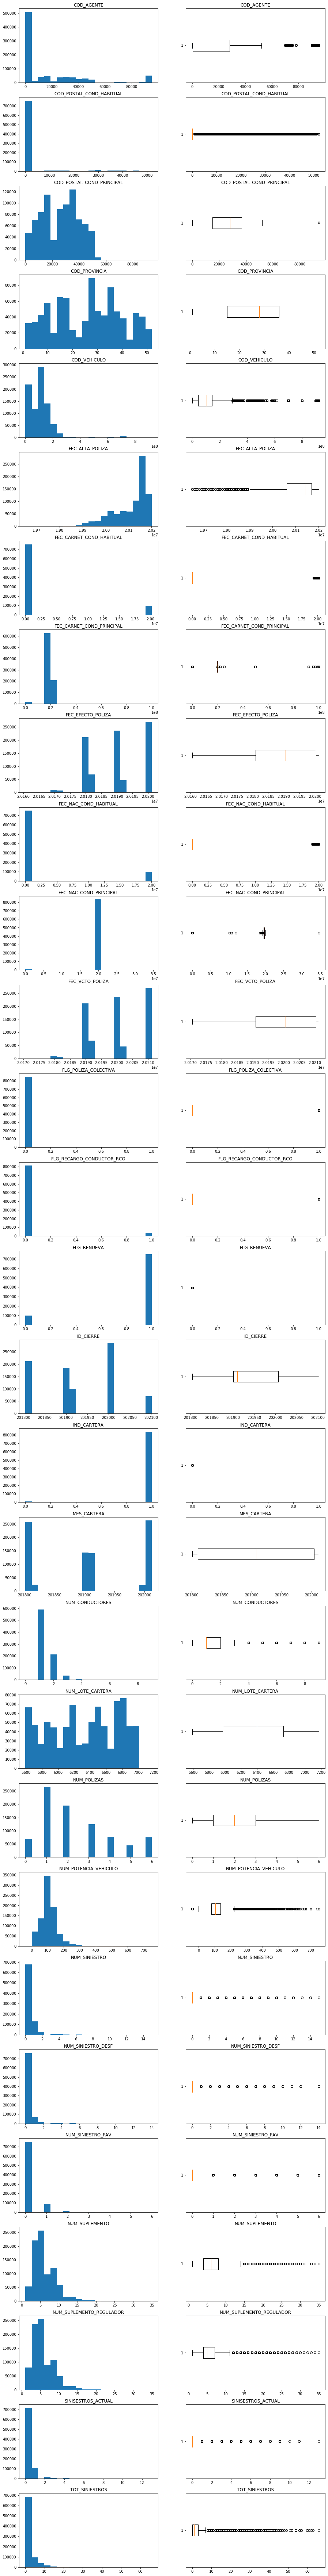

In [31]:
plt.figure(figsize=(15,500))
for i, var in enumerate(np.sort(df_limpio.describe().columns)):
    plt.subplot(df_limpio.columns.shape[0],2,2*i+1)
    plt.hist(df[var], bins = 20)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df_limpio.columns.shape[0],2,2*i+2)
    plt.boxplot(df_limpio[var], vert=False)
    plt.xlabel('')
    plt.title(var)

Saquemos información de estas visualizaciones:
* La columna COD_AGENTE la toma como numérica, pero solo tiene sentido como categórica. Veremos si hay suficientes datos por cada agente como para que nos sirva.
* La columna COD_POSTAL_COND_HABITUAL está mayoritariamente vacía, podemos eliminarla.
* La columna COD_POSTAL_COND_PRINCIPAL también debería ser categórica. Habrá que ver si se deja tal cual, o se agrupa de alguna manera.
* El campo COD_PROVINCIA debe tomarse como categórico.
* El campo COD_VEHICULO debe tomarse como categórico.
* El campo FEC_ALTA_POLIZA tiene un formato extraño. Podemos calcular la antigüedad de la póliza con el campo MES_CARTERA.
* El campo FEC_CARNET_COND_HABITUAL está mayoritariamente vacío, podemos eliminarlo.
* El campo FEC_CARNET_COND_PRINCIPAL tiene un formato extraño. Podemos calcular la antigüedad de carnet del asegurado con el campo MES_CARTERA.
* El campo FEC_NAC_COND_PRINCIPAL tiene un formato extraño. Podemos calcular la edad del asegurado con el campo MES_CARTERA.
* El campo FEC_NAC_COND_HABITUAL está mayoritariamente vacío, podemos eliminarlo.
* El campo FLG_POLIZA_COLECTIVA está a cero en muchísimos casos
* El campo ID_CIERRE es específico del año, como vamos a querer predecir en otros cierres hay que eliminarlo.
* El campo IND_CARTERA está casi siempre a 1.
* Del campo MES_CARTERA podemos extraer el mes, de tal manera que nos sea útil en años venideros
* ¿El campo NUM_LOTE_CARTERA puede corresponderse con ID_CIERRE? Veamoslo ahora
* El campo NUM_POTENCIA_VEHICULO parece seguir una distribución logarítmica normal

In [32]:
columnas_analogas(df_limpio, 'NUM_LOTE_CARTERA', 'ID_CIERRE')

Cuando la columna  NUM_LOTE_CARTERA  tiene valor  6075  la columna  ID_CIERRE  tiene los siguentes valores:
201901
201902
201811


False

In [33]:
df_limpio.groupby(['NUM_LOTE_CARTERA','ID_CIERRE']).size()

NUM_LOTE_CARTERA  ID_CIERRE
5592              201804       10239
5594              201804       10848
5597              201804           6
5602              201804           8
5607              201804          10
5613              201804           6
5616              201804           1
5620              201804           5
5622              201804           1
5625              201805       11126
5626              201805        9581
5629              201804           2
5633              201805           1
5634              201804           1
5641              201804           5
                  201805          66
5642              201804           2
                  201805           2
5643              201805           4
5646              201804           2
                  201805           1
5655              201804           4
                  201805           5
5660              201806       12052
5661              201806       12439
5665              201804           4
          

Parece que hay varios lotes por cierre, pero los datos a futuro aparecerán otros lotes, la columna 'NUM_LOTE_CARTERA' se puede eliminar.

Veamos ahora la distribución por agentes:



In [34]:
df_limpio.groupby('COD_AGENTE').size()

COD_AGENTE
10        3223
20        5146
30        4532
40        5100
50        2745
60        8901
61         390
70        6942
80       17988
81        1953
90        8353
100       7915
101         28
110      13081
111         48
112       3413
120       5567
130       3399
131        900
140      10412
150       9415
151       6634
152       9204
156       1986
160        725
170       4096
180      25539
181        922
190        267
200      11595
210       5217
220       3008
230       7991
240       9972
250       6192
260      11677
266          9
270      10216
280       5661
281       7593
283       5094
290       8466
291        118
300      15187
301       5182
310       6895
320      10211
330      10446
331       5016
340       3853
350      11862
360      11834
361      19771
362       1735
370      11314
380       9036
390      12338
400       2509
410      11915
411        781
416        428
420       1994
430       6270
440       1397
450       6277
451       2407

In [35]:
df_limpio['COD_AGENTE'].nunique()

894

Casi 900 agentes distintos, demasiados para separar en columnas, eliminaremos el campo COD_AGENTE

Veamos ahora los  códigos postales del conductor principal.

In [36]:
df_limpio.groupby('COD_POSTAL_COND_PRINCIPAL').size()

COD_POSTAL_COND_PRINCIPAL
0          86
1001      228
1002      372
1003      382
1004      221
1005      492
1006      297
1007      525
1008      648
1009      145
1010      730
1012      189
1013      161
1015      406
1080        3
1110       31
1118        3
1128        3
1129        1
1130       59
1138       60
1139       28
1169        6
1170       29
1191       17
1192       57
1193       36
1194       30
1195       21
1196        5
1200       30
1206        7
1207       12
1208       23
1211        9
1212        5
1220        6
1230       29
1240       43
1250       14
1300       18
1306       23
1307        6
1309       18
1320        1
1322        3
1330        3
1340       14
1400       53
1408       12
1409       11
1420        9
1423        2
1426        5
1427        3
1428        7
1430        5
1439       19
1440       29
1449       11
1468        3
1470       40
1474       14
1476       12
1477        3
1478        2
1510        3
1520       42
2001     1414
2002    

Muchísimas categorías, muchas de ellas con muy pocos datos. Tenemos un conjunto de datos que contiene información de localidad y provincia por cada código postal, podemos utilizarlo para enriquecer los datos.

In [39]:
dfCodigosPostales = pd.read_csv('data_aux/listado-de-codigos-postales-de-españa.csv', sep=";", encoding="ISO-8859-1")
dfCodigosPostales.head()

,provincia,poblacion,codigopostalid
0,Araba/Álava,Alegría-Dulantzi,240
1,Ávila,Candeleda,548
2,Araba/Álava,Vitoria-Gasteiz,1001
3,Araba/Álava,Vitoria-Gasteiz,1002
4,Araba/Álava,Vitoria-Gasteiz,1003


In [40]:
dfInfoCodigoPostal = pd.merge(left=df_limpio, right=dfCodigosPostales, left_on= 'COD_POSTAL_COND_PRINCIPAL', right_on='codigopostalid', how='left')

In [41]:
dfInfoCodigoPostal.head()

,ID_CIERRE,MES_CARTERA,NUM_LOTE_CARTERA,TIPO_OPERACION,IND_CARTERA,FLG_RENUEVA,FLG_POLIZA_COLECTIVA,DES_FORMA_CONTRATA,DES_FORMA_PAGO,DES_MODO_PAGO,DES_BANCO,NUM_SUPLEMENTO_REGULADOR,NUM_SUPLEMENTO,FEC_ALTA_POLIZA,FEC_EFECTO_POLIZA,FEC_VCTO_POLIZA,COD_MODALIDAD_ANT,COD_MODALIDAD_REG,COD_MODALIDAD_ACT,VAL_MUT_G,VAL_MUT_5,VAL_MUT_1,NUM_POLIZAS,NUM_ANTIGUEDAD_POLIZA,NUM_ANTI_MUTUALISTA,EDAD,NUM_ANTI_CARNET,FLG_CONDUCTOR_HAB,NUM_CONDUCTORES,COD_PROVINCIA,COD_ZONA_TARIFA,NOTABUREAU,NOTAGLOBAL,NOTA_FACTOR_EXPERIAN,FACTOR_EXPERIAN,IMP_ANUALIDAD_ANTERIOR,IMP_PRIMA_TARIFICADOR_RENOVACION,COD_REGULADOR,PORC_REGULADOR,IMP_DIFERENCIA,IMP_PRIMA_RENOV_FINAL,NUM_BONUS_ANTERIOR,NUM_BONUS_ACTUAL,DES_TRAMO_BONUS,DESC_OFICINA_GESTORA,DESC_OFICINA_ABRIDORA,COD_AGENTE,DES_TIPO_CLIENTE,ID_REL_PROFESION,DESC_TITULACION,...,DESC_TIPO_VEHICULO,COD_VEHICULO,NUM_ANTI_MATRICULA,DESC_GRUPO_TARIFICACION,COD_REMOLQUE,NUM_POTENCIA_VEHICULO,DESC_MARCA,DESC_MODELO_VERSION,COD_COMBUSTIBLE,NUM_PUERTAS,IMP_VALOR_VEHICULO,FLG_BUEN_MUTUALISTA,FLG_VEHICULO_NUEVO,FLG_RECARGO_CONDUCTOR_RCO,FLG_RECARGO_CONDUCTOR_DANOS,IMPORTE_TOTAL_DESCUENTO,IMP_DESC_EMPLEADOS_TOTAL,IMP_DESC_COMERCIAL_TOTAL,FLG_DESC_PRECAMPANA,IMP_DESC_PRECAMPANA,FLG_DESC_CAMPANA,IMP_DESC_CAMPANA,FLG_DESC_ESPECIAL,IMP_DESC_ESPECIAL,COD_TIPO_BOLSA_DESCUENTO,FLG_DESC_BOLSA_RETENCION,IMP_DESC_BOLSA_RETENCION,FLG_DESC_REGULADOR,IMP_DESC_REGULADOR,FLG_PRECAM_BUEN_MUTUALISTA,IMP_PRECAM_BUEN_MUTUALISTA,FLG_PRECAM_NUEVO_VEHICULO,IMP_PRECAM_NUEVO_VEHICULO,FLG_PRECAM_MULTIPACK,IMP_PRECAM_MULTIPACK,FLG_CAMPANA_EMPLEADOS,IMP_DESC_EMPLEADOS,FLG_CAMP_EMPL_COLABORADOR,IMP_CAMP_EMPL_COLABORADOR,FLG_CAMPANA_PROV,IMP_CAMPANA_PROV,FLG_CAMP_MOTOS50,IMP_CAMP_MOTOS50,FLG_CAMP_MUTUALISTA_PROPIETARIO,IMP_CAMP_MUTUALISTA_PROPIETARIO,FLG_CAMP_DESC_ESPECIAL,IMP_CAMP_DESC_ESPECIAL,provincia,poblacion,codigopostalid
0,201901,201810,5976,RENOR,1,1,0,Anual renovable,Anual,Por Banco,BANCO DE SABADELL S.A.,6,6,19651014,20181014,20191013,MB,MB,MB,AB,A9,A9,1,"0053,04","0011,21","0067,86","0049,79",S,1,28,C,Z,C,CZ,"-03,000","000000115,73","000000119,36",BA,"-000000011,93","0000000003,63","0000000119,36","-0050,00","-0050,00",0 - Sin cambio en el nivel de bonus,283 - OF. HILARION,281 - OF. VILLANUEVA,281,6 - Familiar de Mutualista,2 - No Sanitaria,9 - OTRAS PROFESIONES,...,TUR - TURISMO,124009200,"0053,04",11 - Automóviles hasta 28 CV,-1,25,SEAT,600,G,0,"000004809,00",0,0,0,"0,","-0000000016,18","000000000,000","-000000016,180","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","1,","-0000016,18000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",Madrid,Madrid,28040.0
1,201804,201801,5592,RENOR,1,1,0,Anual renovable,Anual,Por Banco,BANCO BILBAO VIZCAYA ARGENTARIA (BBVA),6,6,19670113,20180113,20190112,MB,MB,NaN,AB,A9,A9,1,"0051,04","0051,04","0082,82","0030,39",S,1,48,B,Z,C,CZ,"-03,000","000000157,11","000000160,25",BA,"-000000000,01","0000000003,14","0000000160,25","-0050,00","-0050,00",0 - Sin cambio en el nivel de bonus,480 - OF. BILBAO,480 - OF. BILBAO,480,1 - Licenciado Sanitario,1 - Sanitaria,1 - LICENCIADO SANITARIO,...,TUR - TURISMO,124009300,"0051,04",11 - Automóviles hasta 28 CV,-1,25,SEAT,600-D,G,0,"000004809,00",0,0,0,"0,","-0000000000,01","000000000,000","-000000000,010","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","0,","-0000000,01000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",Bizkaia,Bilbao,48001.0
2,201806,201803,5661,RENOR,1,1,0,Anual renovable,Anual,Por Banco,BANCO SANTANDER S.A.,6,6,19680330,20180330,20190329,MB,MB,NaN,AB,A9,A9,0,"0050,03","0050,03","0065,52","0030,85",S,1,28,C,Z,D,DZ,"-02,000","000000197,75","000000203,77",BA,"-000000005,14","0000000006,02","00

Veamos ahora la agrupación por provincias y si es consistente con el campo 'COD_PROVINCIA'.

In [42]:
dfInfoCodigoPostal.groupby(['COD_PROVINCIA','provincia']).size()

COD_PROVINCIA  provincia             
1              Araba/Álava                6437
               Barcelona                     2
               Bizkaia                      16
               Burgos                       18
               Cádiz                         1
               Gipuzkoa                      6
               Girona                        2
               La Rioja                     17
               Las Palmas                    1
               León                          1
               Madrid                        8
               Málaga                        2
               Ourense                       4
2              Albacete                   9419
               Alicante/Alacant              3
               Almería                       1
               Badajoz                       2
               Bizkaia                       4
               Cuenca                       23
               Gipuzkoa                      9
               Granada

Está claro que para cada uno de los COD_PROVINCIA hay una provincia muy mayoritaria, pero también hay bastantes discrepancias.

Deberemos eliminar la columna 'codigopostalid'

Ahora veamos el Codigo de vehículo. Parece que se va a corresponder con la DESC_MODELO_VERSION

In [43]:
dfInfoCodigoPostal.groupby(['COD_VEHICULO','DESC_MODELO_VERSION']).size()

COD_VEHICULO  DESC_MODELO_VERSION                     
1001100       ALFETA                                         2
1001603       147-1.9-JTD-IMPRESSION-3P-BHP                  1
1002400       GTV-2.0                                        2
1002600       SPIDER-2.0-VELOCE                              3
1002800       SPRINT-QUADRIF-VERD                            7
1004000       75-2.0                                         5
1004400       33-1.5-TI                                      3
1004900       75-2.5-V6                                      3
1005000       75-2.0-TWIN-SPARK                              4
1005300       SPIDER-2.0-QV                                  6
1005800       164-2.0-TWIN-SPARK                             3
1006900       164-3.0-V6                                     3
1008300       75-TWIN-SPARK-PODIUM                           3
1008401       MITO-1.4                                       3
1009200       SPIDER-2.0-IE                                  3


Hay muchísimos modelos. Tal como está no nos vale. Podemos probar a inferir algo de información, pero de momento vamos a quitar el COD_VEHICULO.

Siguiente, vamos a trabajar las columnas de fechas:

In [77]:
def entero_a_fecha(fecha_entero):
    if fecha_entero==0:
        return datetime.date(1800, 1, 1)
    fecha_string = str(fecha_entero)
    if len(fecha_string)<4:
        return datetime.date(1800, 1, 1)
    anyo = max(int(fecha_string[:4]),1800)
    mes = int(fecha_string[4:6]) or 1 
    if len(fecha_string) < 7 :
        dia = 1 
    else:
        dia = int(fecha_string[6:8])
    try:
        return datetime.date(anyo, mes, dia)
    except:
        return datetime.date(1800, 1, 1)

In [78]:
dfFormatoFecha = dfInfoCodigoPostal.copy()
dfFormatoFecha['FEC_ALTA_POLIZA'] = dfFormatoFecha['FEC_ALTA_POLIZA'].map(entero_a_fecha)
dfFormatoFecha['FEC_CARNET_COND_PRINCIPAL'] = dfFormatoFecha['FEC_CARNET_COND_PRINCIPAL'].map(entero_a_fecha)
dfFormatoFecha['FEC_NAC_COND_PRINCIPAL'] = dfFormatoFecha['FEC_NAC_COND_PRINCIPAL'].map(entero_a_fecha)

In [79]:
dfFormatoFecha['MES_CARTERA'] = dfFormatoFecha['MES_CARTERA'].map(entero_a_fecha)

In [80]:
dfFormatoFecha['EDAD_COND_PRINCIPAL'] = (dfFormatoFecha['MES_CARTERA'] - dfFormatoFecha['FEC_NAC_COND_PRINCIPAL']) / np.timedelta64(1, 'Y')

In [115]:
dfInfoCodigoPostal['FEC_CARNET_COND_PRINCIPAL'].min()

0

In [100]:
dfFormatoFecha['ANTIG_CARNET_COND_PRINCIPAL']

dtype('O')

In [92]:
dfFormatoFecha['ANTIG_CARNET_COND_PRINCIPAL'] = (dfFormatoFecha['MES_CARTERA'] - dfFormatoFecha['FEC_CARNET_COND_PRINCIPAL'])
dfFormatoFecha['ANTIG_CARNET_COND_PRINCIPAL'] = dfFormatoFecha['ANTIG_CARNET_COND_PRINCIPAL'] / np.timedelta64(1, 'Y')
dfFormatoFecha['ANTIG_CARNET_COND_PRINCIPAL'].head()

OverflowError: int too big to convert

### Análisis de valores ausentes

In [ ]:
msno.bar(df_limpio, color='blue', inline=False, filter ='bottom', sort='ascending', n = 12)
plt.title('Variables con valores ausentes', fontsize=55)
plt.show()

In [ ]:
msno.heatmap(df_limpio)